# **FASE IV: MODELADO (NO-SUPERVISADO)**

In [1]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

monopoly = pd.read_parquet('../monopoly_cleaned_parquet')

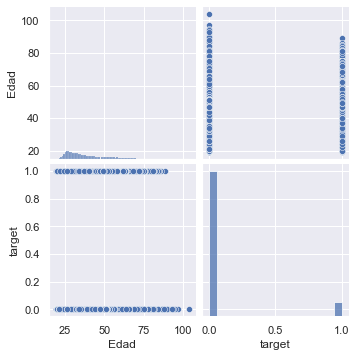

In [2]:
# Pair-plot
sns.set()
sns.pairplot(data=monopoly ,vars=["Edad", "target"])
plt.show()

## **CLUSTERING JERÁRQUICO (usando el metodo BIRCH)**

In [79]:
monopoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null 

In [3]:
#'Edad' y 'target'
X =monopoly.iloc[:, [3,20]].values

### **Modelo N°1**

In [4]:
from sklearn.cluster import AgglomerativeClustering

cj_1 = AgglomerativeClustering(affinity='euclidean', linkage='single',n_clusters=3)

In [5]:
Y_hat = cj_1.fit_predict(X)

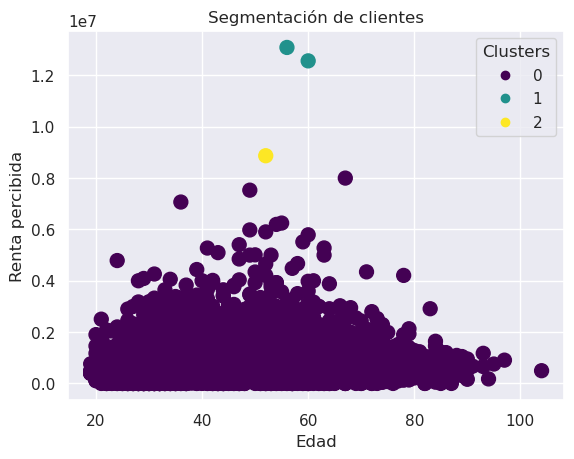

In [88]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta percibida')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

SScj_1 = silhouette_score(X, Y_hat, metric='euclidean')


print("Silhouette Score:", SScj_1)

Silhouette Score: 0.7051092122637753


### **Modelo N°2**

In [7]:
from sklearn.cluster import AgglomerativeClustering

cj_2 = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=50, n_clusters=None)
Y_hat = cj_2.fit_predict(X)

In [8]:
# Número de clusters
num_clusters = len(set(Y_hat))
print(f"Número de clusters: {num_clusters}")

Número de clusters: 2


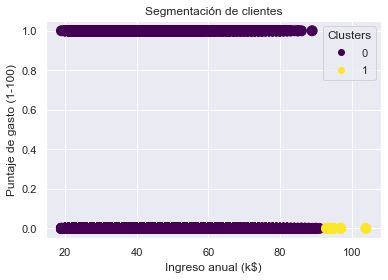

In [9]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [10]:
SScj_2 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_2)

Silhouette Score: 0.6991920823820716


### **Modelo N°3**

In [20]:
#'Edad' y 'Renta'
X =monopoly.iloc[:, [3,4]].values

In [21]:
# Aplicar clustering jerárquico aglomerativo
cj_3 = AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=3)
Y_hat = cj_3.fit_predict(X)

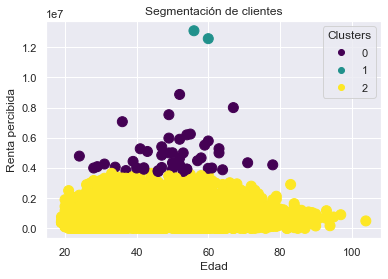

In [22]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta percibida')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [23]:
SScj_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_3)

Silhouette Score: 0.9118033653640154


## **Modelo N°4**

In [24]:
#'Edad', 'Renta' y 'target'
X = monopoly.iloc[:, [3,4,20]].values

In [25]:
# Aplicar clustering jerárquico aglomerativo
cj_4 = AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=3)
Y_hat = cj_4.fit_predict(X)

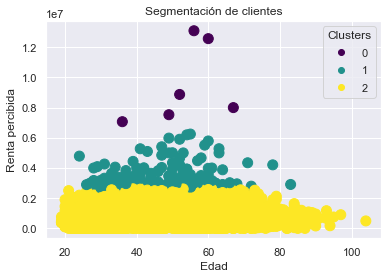

In [26]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta percibida')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [27]:
SScj_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_4)

Silhouette Score: 0.8697388065396136


In [28]:
tabla = {'Modelo': ['CJ1', 'CJ2', 'CJ3', 'CJ4'],
         'Silhouette Score': [SScj_1, SScj_2, SScj_3, SScj_4]}

tabla = pd.DataFrame(tabla, columns = ['Modelo', 'Silhouette Score'])
tabla

,Modelo,Silhouette Score
0,CJ1,0.705109
1,CJ2,0.699192
2,CJ3,0.911803
3,CJ4,0.869739
